# Challenge 2
by: Marion Pillas, Nicola Borghi and Paul Lagabbe

## Install package

In [ ]:
! pip install -q 'lalsuite==6.82' 'PyCBC==1.18.0' 'gwpy==2.0.2'

     |████████████████████████████████| 27.3MB 150kB/s 
     |████████████████████████████████| 6.3MB 17.7MB/s 
     |████████████████████████████████| 1.4MB 26.2MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 1.6MB 15.5MB/s 
     |████████████████████████████████| 890kB 22.0MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 3.2MB 24.5MB/s 


## Question 1
Import libraries and data

Plot the Q tranform of the data

In [ ]:
# import labraries
import numpy as np
import matplotlib.pyplot as plt
from pycbc.frame import read_frame
from pycbc.frame import query_and_read_frame

# import data

file_name = '/content/challenge2.gwf'
channel_name = 'H1:CHALLENGE2'
hdata = read_frame(file_name, channel_name)
print('data:', hdata)

# define useful variable
dt = hdata.get_delta_t()
duration = hdata.get_duration()
sample_rate = hdata.get_sample_rate()
start_time = hdata.start_time
end_time = hdata.end_time
d_f = hdata.delta_f




ModuleNotFoundError: ignored

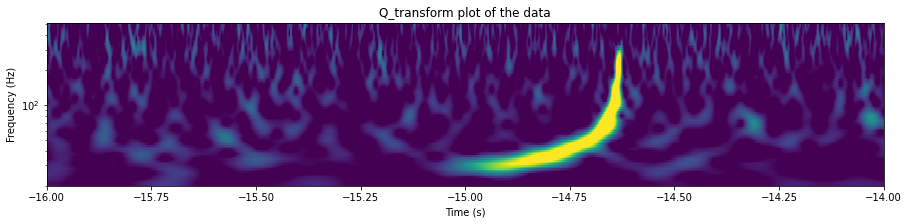

(100, 524288)

In [ ]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt

# computing the q_transform
t, f, p = hdata.qtransform(delta_t=dt, logfsteps=100, qrange=(10, 11), frange=(20, 512))
# plot the q_transfrom
pylab.figure(figsize=[15, 3])
pylab.title('Q_transform plot of the data')
pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
pylab.yscale('log')
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.xlim(-16,-14)
pylab.show()
p.shape

The approximative time of the merger is -15.6 s.

The data time is between -64 s and 64 s

## Question 2

Generate a time-domain template waveform with masses of 30 solar masses, and spin of 0

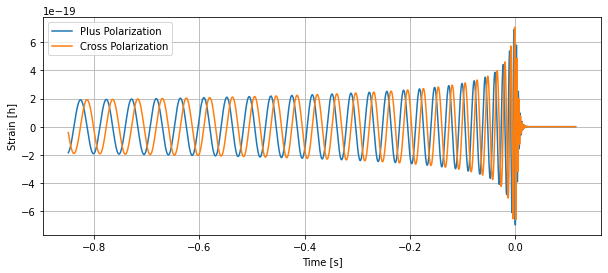

In [ ]:
from pycbc.waveform import get_td_waveform

# compute the waveform
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=dt,
                         f_lower=20,
                         spin1z=0,
                         spin2z=0)
# plot the h+ and hx signals
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time [s]')
pylab.ylabel('Strain [h]')
pylab.legend()
pylab.grid()
pylab.show()

## Question 3

Computation of the power spectral density of the data

In [ ]:
#Compute the power spectral density

psd = hdata.filter_psd(segment_duration=16, delta_f=d_f, flow=20)
frequency = np.arange(0, sample_rate / 2. + d_f, d_f) 

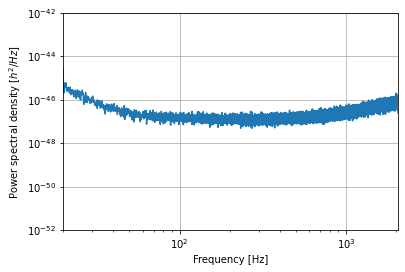

In [ ]:
# plot the power spectral density
pylab.figure()
plt.grid()
plt.plot(frequency, psd)
plt.xlim(20,sample_rate / 2.)
plt.ylim(1e-52, 1e-42)
pylab.xlabel('Frequency [Hz]')
pylab.ylabel('Power spectral density [$h^2/Hz$]')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Question 4
Compute SNR of the signal time series

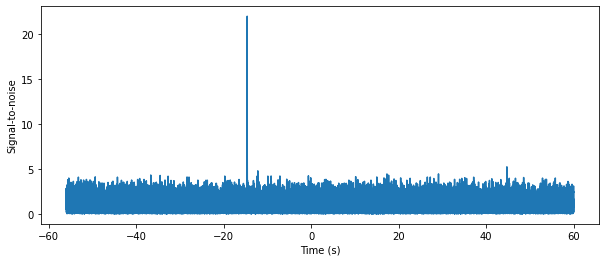

In [ ]:
#Waveform for question 2 : 
hp.resize(len(hdata))
hc.resize(len(hdata))


from pycbc.filter import matched_filter
import numpy

template = hp.cyclic_time_shift(hp.start_time)

snr = matched_filter(template, hdata, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4)
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()



## Question 5

In [ ]:
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))# uncertainties ?

We found a signal at -14.6328125s with SNR 22.015995615573793
